In [208]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

<h3> Q1. Loading the DataSet into Pandas </h3>

In [209]:
# Loading the dataset
data = pd.read_csv('Dataset/DataScienceSalaries.csv')
data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [210]:
# Checking the shape of the dataset
data.shape

(3755, 11)

In [211]:
# Checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [212]:
# Checking the summary statistics of the dataset
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [213]:
# Checking for missing values
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [214]:
# Checking for duplicate values
data.duplicated().sum()

1171

In [215]:
# Checking Unique values in the dataset
data.nunique()


work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [216]:
# Removing the Unnesessary columns salary and salary_currency
data.drop(['salary', 'salary_currency'], axis=1, inplace=True)
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [217]:
# Checking if there are any NaN missing values
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [218]:
# Checking Duplicate Values in the dataset
data.duplicated().sum()

1171

In [219]:
# Checking Unique values in the dataset
data.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [220]:
# Renaming the Experience Level Column as Follows SE - Senior Level/Expert, MI - Medium Level/Intermediate, EN - Entry Level, EX - Executive Level
data['experience_level'] = data['experience_level'].replace(['SE', 'MI', 'EN', 'EX'], 
                                                            ['Senior Level/Expert', 
                                                            'Medium Level/Intermediate',
                                                            'Entry Level',
                                                            'Executive Level'])
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level/Expert,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Medium Level/Intermediate,CT,ML Engineer,30000,US,100,US,S
2,2023,Medium Level/Intermediate,CT,ML Engineer,25500,US,100,US,S
3,2023,Senior Level/Expert,FT,Data Scientist,175000,CA,100,CA,M
4,2023,Senior Level/Expert,FT,Data Scientist,120000,CA,100,CA,M


In [221]:
# Sum of the Variable Salary In USD
data['salary_in_usd'].sum()
print('Sum of the Variable Salary In USD:', data['salary_in_usd'].sum())
# Mean of the Variable Salary In USD
data['salary_in_usd'].mean()
print('Mean of the Variable Salary In USD:', data['salary_in_usd'].mean())
# Standard Deviation of the Variable Salary In USD
print('Standard Deviation of the Variable Salary In USD:', data['salary_in_usd'].std())
# Skewness of the Variable Salary In USD
print('Skewness of the Variable Salary In USD:', data['salary_in_usd'].skew())
# Kurtosis of the Variable Salary In USD
print('Kurtosis of the Variable Salary In USD:', data['salary_in_usd'].kurt())

Sum of the Variable Salary In USD: 516576814
Mean of the Variable Salary In USD: 137570.38988015978
Standard Deviation of the Variable Salary In USD: 63055.6252782241
Skewness of the Variable Salary In USD: 0.5364011659712974
Kurtosis of the Variable Salary In USD: 0.8340064594833612


In [222]:
# Correlation Between the Numerical Variables In the Dataset
correlation_matrix = data.select_dtypes(include=['int64']).corr()
correlation_matrix

,work_year,salary_in_usd,remote_ratio
work_year,1.00000,0.228290,-0.236430
salary_in_usd,0.22829,1.000000,-0.064171
remote_ratio,-0.23643,-0.064171,1.000000


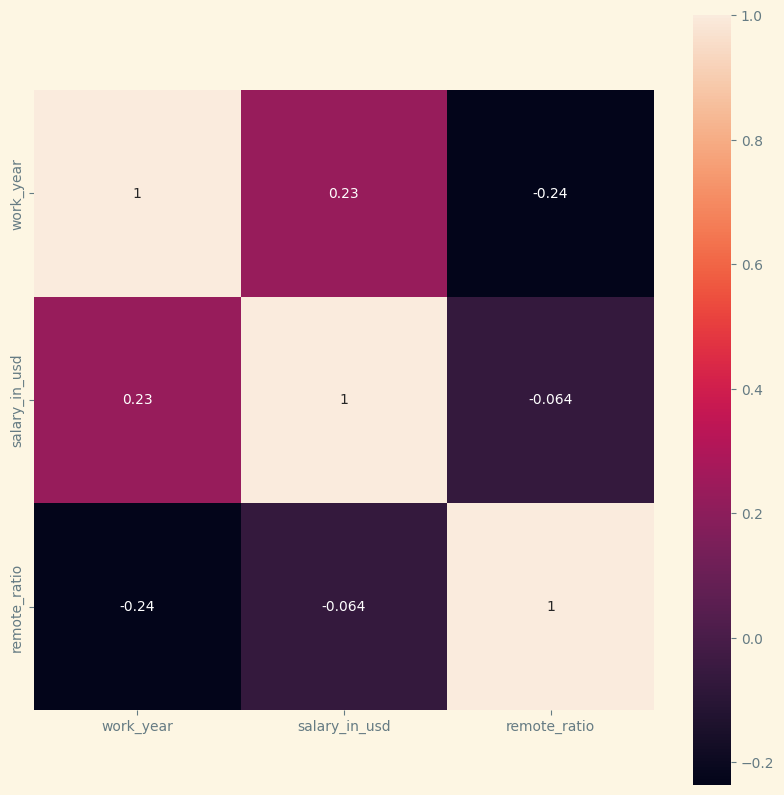

In [223]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, square=True)
plt.show()

In [224]:
# Finding the 15 Most Popular Job Titles
top_15_jobs = data['job_title'].value_counts().head(15)
top_15_jobs


job_title
Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Data Science Tech Lead'),
  Text(1, 0, 'Cloud Data Architect'),
  Text(2, 0, 'Data Lead'),
  Text(3, 0, 'Data Analytics Lead'),
  Text(4, 0, 'Principal Data Scientist'),
  Text(5, 0, 'Director of Data Science'),
  Text(6, 0, 'Principal Data Engineer'),
  Text(7, 0, 'Machine Learning Software Engineer'),
  Text(8, 0, 'Data Science Manager'),
  Text(9, 0, 'Applied Scientist'),
  Text(10, 0, 'Principal Machine Learning Engineer'),
  Text(11, 0, 'Head of Data'),
  Text(12, 0, 'Data Infrastructure Engineer'),
  Text(13, 0, 'Business Intelligence Engineer'),
  Text(14, 0, 'Machine Learning Scientist')])

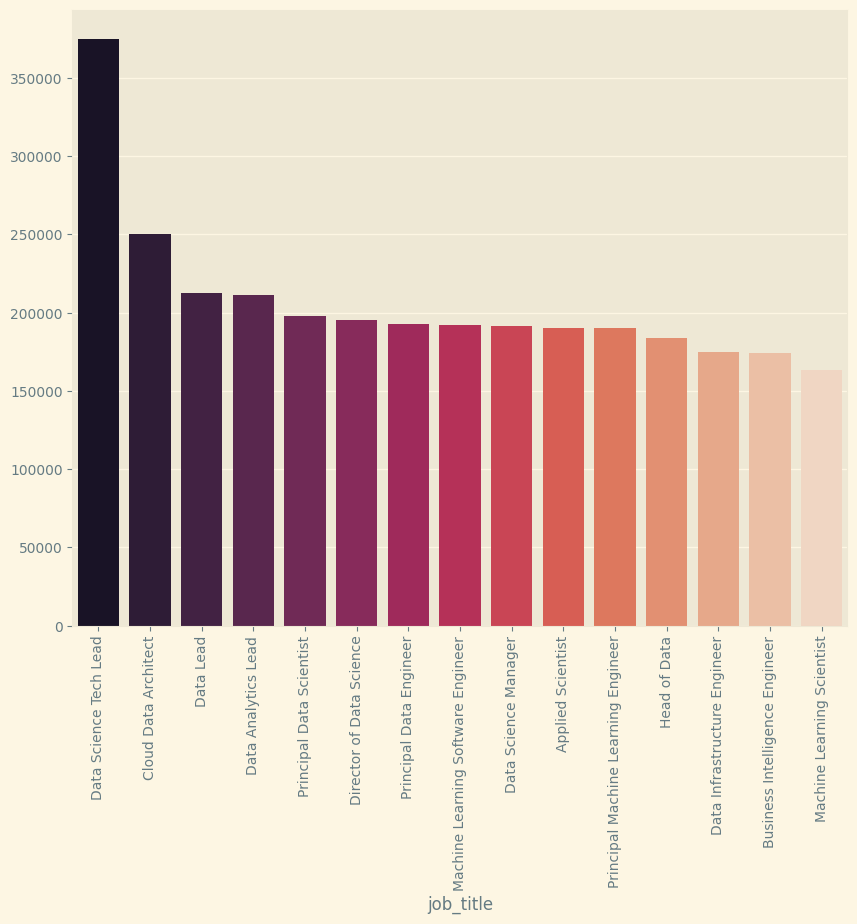

In [225]:
# Mean of the Salary In USD for the 15 Most Popular Job Titles
mean_salary_top_15_jobs = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(15)
# Barplot of the 15 Most Popular Job Titles
plt.figure(figsize=(10, 8))
sns.barplot(x=mean_salary_top_15_jobs.index, y=mean_salary_top_15_jobs.values, palette='rocket', hue=mean_salary_top_15_jobs.index)
plt.xticks(rotation=90)


C:\Users\zerox\AppData\Local\Temp\ipykernel_13088\2933012808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary.index, y=job_salary.values, palette='rocket')


Text(0, 0.5, 'Salary in USD')

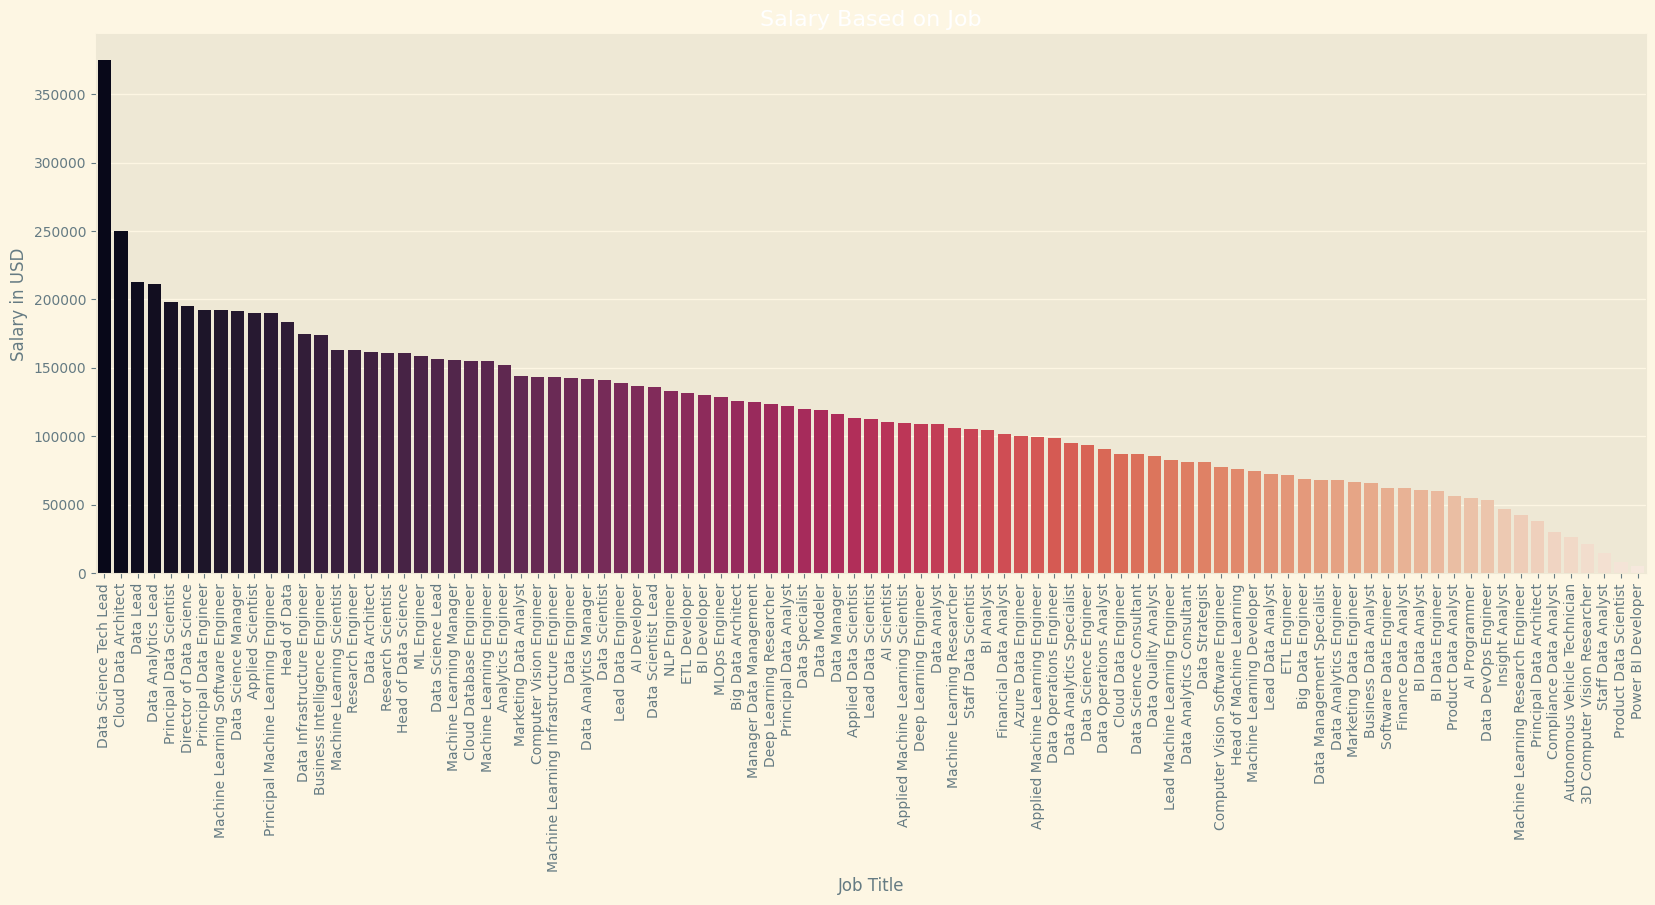

In [226]:
# Salaries Based on Job
job_salary = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
job_salary
# Bar Graph for the Salary Based on Job
plt.figure(figsize=(20, 7))
sns.barplot(x=job_salary.index, y=job_salary.values, palette='rocket')
plt.title('Salary Based on Job')
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.ylabel('Salary in USD')


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.2+ KB


<h1>Python Program to Find out Salaries Based on Experience Level</h1>

([0, 1, 2, 3],
 [Text(0, 0, 'Entry Level'),
  Text(1, 0, 'Executive Level'),
  Text(2, 0, 'Medium Level/Intermediate'),
  Text(3, 0, 'Senior Level/Expert')])

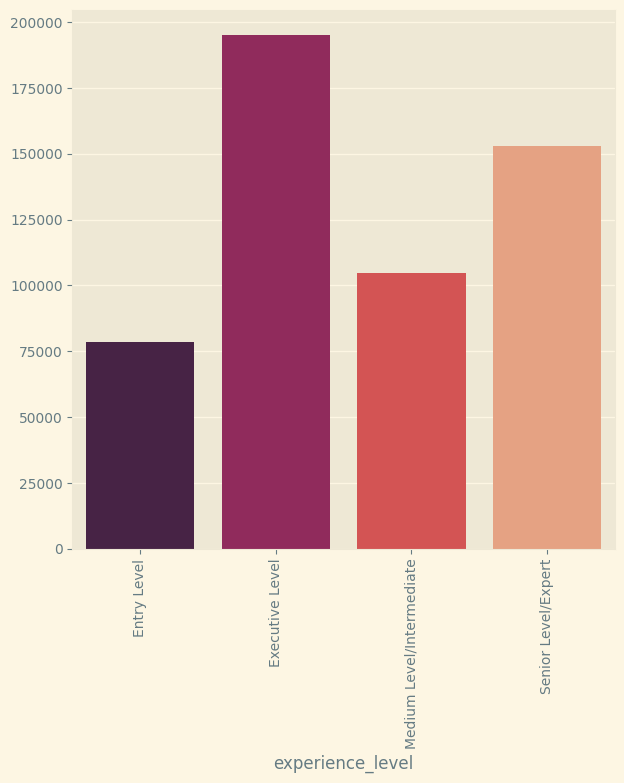

In [228]:
salary_explvl = data.groupby('experience_level')['salary_in_usd'].mean().round()
plt.figure(figsize=(7,7))
plt.style.use('Solarize_Light2')
sns.barplot(x=salary_explvl.index, y=salary_explvl.values, palette='rocket', hue=salary_explvl.index)
plt.xticks(rotation=90)

<Axes: xlabel='experience_level', ylabel='Count'>

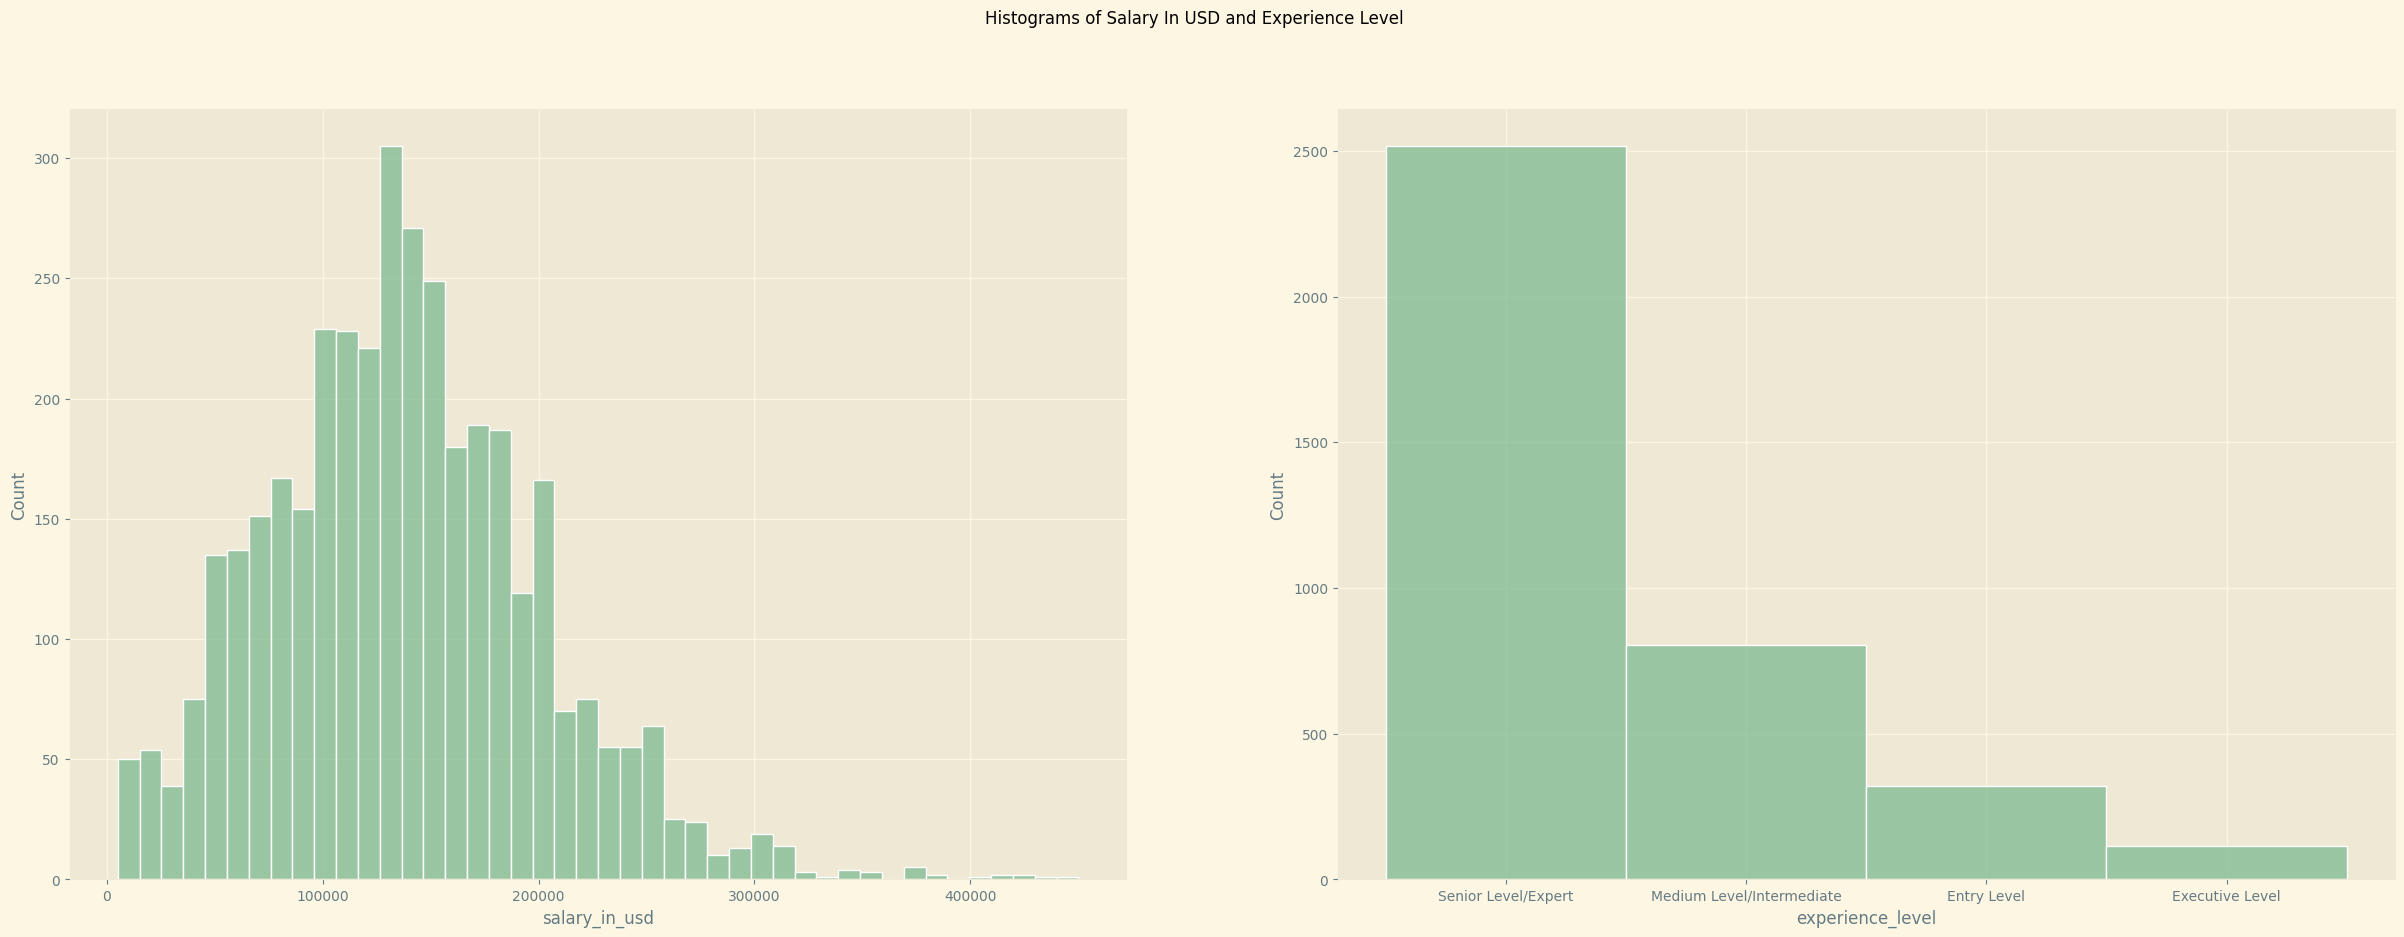

In [249]:
# Assigning the Variables to be Used to Create the Boxplot and Histogram
v1 = 'salary_in_usd'
v2 = 'experience_level'

plt.figure(figsize=(30,10))
sns.set_palette('crest')
plt.suptitle('Histograms of Salary In USD and Experience Level', color='black')
plt.subplot(1,2,1)
sns.histplot(data[v1])
plt.subplot(1,2,2)
sns.histplot(data[v2])

C:\Users\zerox\AppData\Local\Temp\ipykernel_13088\3622342952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[v2],y=data[v1], palette='rocket', linewidth=2)


Text(0.5, 1.0, 'Boxplot of Salary In USD and Experience Level')

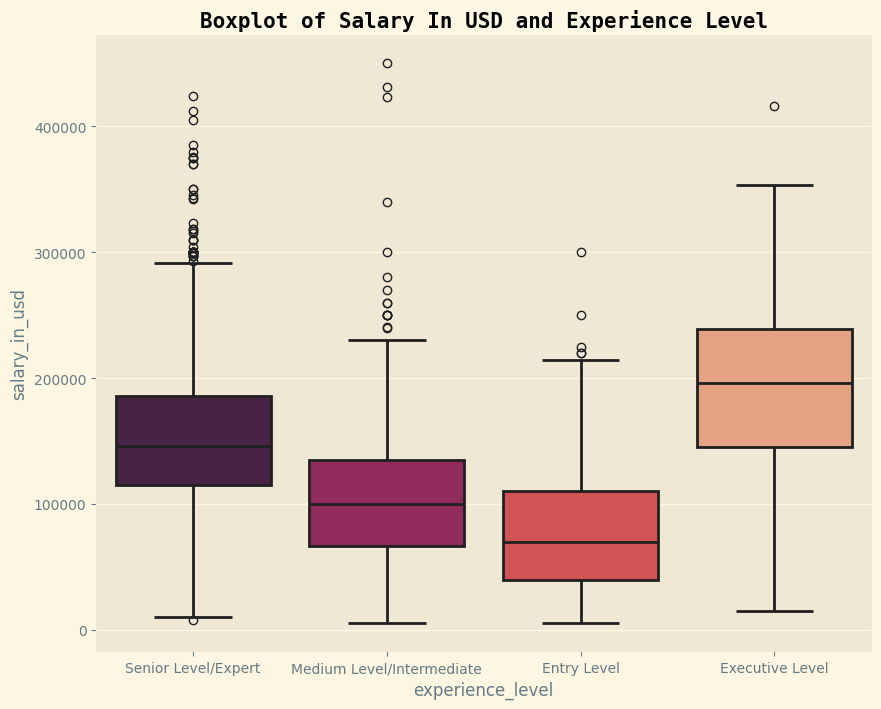

In [248]:

# Box Plot for The Two Variables
plt.figure(figsize=(10,8))
sns.boxplot(x=data[v2],y=data[v1], palette='rocket', linewidth=2)
plt.title('Boxplot of Salary In USD and Experience Level',
          fontsize=15, fontweight='bold',
          fontfamily='monospace', color='black')